# Setup and imports

In [ ]:
# imports
import numpy as np
from tueplots import bundles, figsizes
import wandb
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd


import sys

%load_ext autoreload
%autoreload 2

sys.path.insert(0, '.')

In [ ]:
from analysis import sweep2df, plot_typography, stats2string, RED, BLUE

In [ ]:
USETEX = True

In [ ]:
plt.rcParams.update(bundles.icml2022(usetex=USETEX))
# plt.rcParams.update({
#     'text.latex.preamble': [r'\usepackage{amsfonts}', # mathbb
#                             r'\usepackage{amsmath}'] # boldsymbol
# })

In [ ]:
plot_typography(usetex=USETEX, small=12, medium=16, big=20)


In [ ]:
# Constants
ENTITY = "causal-representation-learning"
PROJECT = "rule_extrapolation"

# W&B API
api = wandb.Api(timeout=200)
runs = api.runs(ENTITY + "/" + PROJECT)

# Data loading

## baN

In [38]:
SWEEP_ID = "y2193u7e"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"ban_{SWEEP_ID}"
ban_df,ban_train_loss,ban_val_loss,ban_val_kl,ban_val_accuracy,ban_finised,ban_ood_finised,ban_sos_finised,ban_r1,ban_r2,ban_grammatical,ban_ood_r1,ban_ood_r1_completion,ban_ood_r2,ban_ood_grammatical,ban_sos_r1,ban_sos_r2,ban_sos_grammatical= sweep2df(sweep.runs, filename, save=True, load=False)

## bbaN

In [39]:
SWEEP_ID = "hup2v4ru"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"bban_{SWEEP_ID}"
bban_df,bban_train_loss,bban_val_loss,bban_val_kl,bban_val_accuracy,bban_finised,bban_ood_finised,bban_sos_finised,bban_r1,bban_r2,bban_grammatical,bban_ood_r1,bban_ood_r1_completion,bban_ood_r2,bban_ood_grammatical,bban_sos_r1,bban_sos_r2,bban_sos_grammatical= sweep2df(sweep.runs, filename, save=True, load=False)

## aNbN

In [40]:
SWEEP_ID = "nfrfpkqm"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"anbn_{SWEEP_ID}"
anbn_df,anbn_train_loss,anbn_val_loss,anbn_val_kl,anbn_val_accuracy,anbn_finised,anbn_ood_finised,anbn_sos_finised,anbn_r1,anbn_r2,anbn_grammatical,anbn_ood_r1,anbn_ood_r1_completion,anbn_ood_r2,anbn_ood_grammatical,anbn_sos_r1,anbn_sos_r2,anbn_sos_grammatical= sweep2df(sweep.runs, filename, save=True, load=False)

ValueError: zero-size array to reduction operation minimum which has no identity

## aNbNcN

In [ ]:
SWEEP_ID = "6m1qb70e"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"anbncn_{SWEEP_ID}"
anbncn_df,anbncn_train_loss,anbncn_val_loss,anbncn_val_kl,anbncn_val_accuracy,anbncn_finised,anbncn_ood_finised,anbncn_sos_finised,anbncn_r1,anbncn_r2,anbncn_grammatical,anbncn_ood_r1,anbncn_ood_r1_completion,anbncn_ood_r2,anbncn_ood_grammatical,anbncn_sos_r1,anbncn_sos_r2,anbncn_sos_grammatical= sweep2df(sweep.runs, filename, save=True, load=False)

## Matched brackets and parentheses

In [ ]:
SWEEP_ID = "r9wywplg"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"brackets_{SWEEP_ID}"
brackets_df,brackets_train_loss,brackets_val_loss,brackets_val_kl,brackets_val_accuracy,brackets_finised,brackets_ood_finised,brackets_sos_finised,brackets_r1,brackets_r2,brackets_grammatical,brackets_ood_r1,brackets_ood_r1_completion,brackets_ood_r2,brackets_ood_grammatical,brackets_sos_r1,brackets_sos_r2,brackets_sos_grammatical= sweep2df(sweep.runs, filename, save=True, load=False)

# Plots

## helper functions


In [41]:
# group by model

def grouped_rule_stats(df):
    grouped_df = df.groupby("model")

    stats = {}

    stats["val_loss"] = grouped_df.min_val_loss

    stats["rule_1"] = grouped_df.rule_1_accuracy4min_val_loss
    stats["rule_2"] = grouped_df.rule_2_accuracy4min_val_loss
    stats["grammatical"] = grouped_df.grammatical_accuracy4min_val_loss
    stats["finished"] = grouped_df.finished4min_val_loss

    stats["ood_rule_1"] = grouped_df.ood_rule_1_accuracy4min_val_loss
    stats["ood_rule_2"] = grouped_df.ood_rule_2_accuracy4min_val_loss
    stats["ood_rule_2_completion"] = grouped_df.ood_rule_2_completion_accuracy4min_val_loss
    stats["ood_grammatical"] = grouped_df.ood_grammatical_accuracy4min_val_loss
    stats["ood_finished"] = grouped_df.ood_finished4min_val_loss

    stats["sos_rule_1"] = grouped_df.sos_rule_1_accuracy4min_val_loss
    stats["sos_rule_2"] = grouped_df.sos_rule_2_accuracy4min_val_loss
    stats["sos_grammatical"] = grouped_df.sos_grammatical_accuracy4min_val_loss
    stats["sos_finished"] = grouped_df.sos_finished4min_val_loss

    return stats


In [43]:
ban_stats = grouped_rule_stats(ban_df)
bban_stats = grouped_rule_stats(bban_df)
# anbn_stats = grouped_rule_stats(anbn_df)
anbncn_stats = grouped_rule_stats(anbncn_df)
brackets_stats = grouped_rule_stats(brackets_df)

In [44]:
def plot_loss_vs_rules(df, stats, cmap="coolwarm", TICK_PADDING=2, LABELPAD=1, filename=None):

    fig = plt.figure(figsize=figsizes.icml2022_full(nrows=1, ncols=2)['figure.figsize'])
    ax = fig.add_subplot(121)
    ax.grid(True, which="both", ls="-.")
    ax.set_axisbelow(True)
    for model in stats["val_loss"].groups.keys():

        im = ax.scatter(df[df.model == model].min_val_loss,
                        100 * df[df.model == model].ood_rule_1_accuracy4min_val_loss, cmap=cmap, label=model)
    ax.set_ylabel("R1 \%", labelpad=LABELPAD)
    ax.set_xlabel("Minimum test loss", labelpad=LABELPAD)
    # plt.legend()
    ax.tick_params(axis='both', which='major', pad=TICK_PADDING)
    ax = fig.add_subplot(122)
    ax.grid(True, which="both", ls="-.")
    ax.set_axisbelow(True)
    for model in stats["val_loss"].groups.keys():
        im = ax.scatter(df[df.model == model].min_val_loss,
                        100 * df[df.model == model].ood_rule_2_completion_accuracy4min_val_loss, cmap=cmap, label=model)
    ax.set_ylabel("R2 completion (\%)", labelpad=LABELPAD)
    ax.set_xlabel("Minimum test loss", labelpad=LABELPAD)
    plt.legend(loc='lower center')
    ax.tick_params(axis='both', which='major', pad=TICK_PADDING)

    if filename is not None:
        plt.savefig(f"{filename}.svg")

## baN

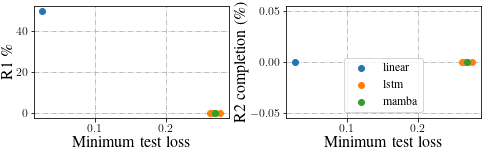

In [45]:
plot_loss_vs_rules(ban_df, ban_stats, filename="ban_loss_vs_rules")

## bbaN

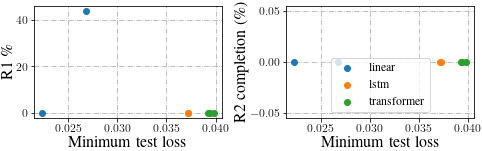

In [48]:
plot_loss_vs_rules(bban_df, bban_stats, filename="bban_loss_vs_rules")

## aNbN

In [ ]:
plot_loss_vs_rules(bban_df, bban_stats, filename="bban_loss_vs_rules")

## aNbNcN

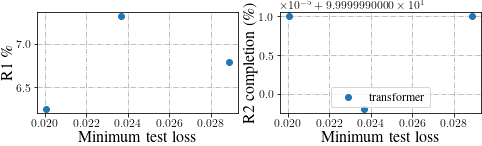

In [46]:
plot_loss_vs_rules(anbncn_df, anbncn_stats, filename="anbncn_loss_vs_rules")

## Matched brackets and parentheses

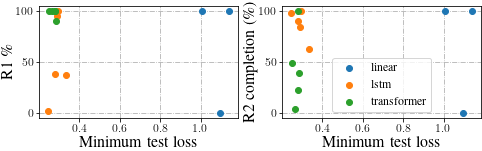

In [47]:
plot_loss_vs_rules(brackets_df, brackets_stats, filename="brackets_loss_vs_rules")

## Plot for all languages

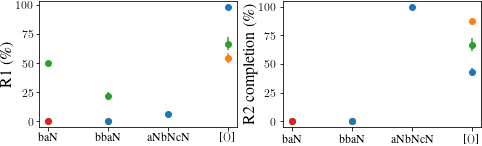

In [64]:
TICK_PADDING = 2
LABELPAD = 1
cmap = "coolwarm"

stats_dict = {
    "baN": ban_stats,
    "bbaN": bban_stats,
    # "aNbN": anbn_stats,
    "aNbNcN": anbncn_stats,
    "[()]": brackets_stats
}

colors = {
        "transformer": "tab:blue",
        "lstm": "tab:orange",
        "linear": "tab:green",
        "mamba": "tab:red"
        }


x_pos = list(range(len(stats_dict)))

fig = plt.figure(figsize=figsizes.icml2022_full(nrows=1, ncols=2)['figure.figsize'])

ax = fig.add_subplot(121)
# ax.grid(True, which="both", ls="-.")
# ax.set_axisbelow(True)

for x, (key, stats) in enumerate(stats_dict.items()):
    for model in stats["val_loss"].groups.keys():

        ax.errorbar(x, 100*stats["ood_rule_1"].get_group(model).mean(), yerr=10*stats["ood_rule_1"].get_group(model).std(), fmt='o',label=model, c=colors[model])


ax.set_ylabel("R1 (\%)", labelpad=LABELPAD)

# set xtick names
ax.set_xticks(x_pos)
ax.set_xticklabels(stats_dict.keys())

ax2 = fig.add_subplot(122)

for x, (key, stats) in enumerate(stats_dict.items()):
    for model in stats["val_loss"].groups.keys():
        ax2.errorbar(x, 100*stats["ood_rule_2_completion"].get_group(model).mean(), yerr=10*stats["ood_rule_2_completion"].get_group(model).std(), fmt='o',c=colors[model], label = model)


# set xtick names
ax2.set_xticks(x_pos)
ax2.set_xticklabels(stats_dict.keys())
ax2.set_ylabel("R2 completion (\%)", labelpad=LABELPAD)


# plt.legend()
ax.tick_params(axis='both', which='major', pad=TICK_PADDING)
